In [35]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scienceplots
from itertools import zip_longest
import pandas as pd
from scipy import stats

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    'font.size': 20,         #Tamaño de fuente general
    'axes.titlesize': 20,    #Tamaño de fuente para títulos de ejes
    'axes.labelsize': 20,    #Tamaño de fuente para etiquetas de ejes
    'xtick.labelsize': 20,   #Tamaño de fuente para etiquetas del eje x
    'ytick.labelsize': 20,   #Tamaño de fuente para etiquetas del eje y
    'legend.fontsize': 15,   #Tamaño de fuente para la leyenda
    'figure.titlesize': 20   #Tamaño de fuente para el título de la figura
})

plt.style.use(['science', 'grid'])

In [36]:
#leyendo el archivo
file_name_tng300 = 'Table_TNG300_snapshot99_ALL_NEWVERSION.hdf5'
tng300_file = h5py.File(file_name_tng300, 'r')
print('---------------------------------------------------------------------------------------------------------------------------------------------------------')
print('Llaves del archivo: ', list(tng300_file.keys()))
print('---------------------------------------------------------------------------------------------------------------------------------------------------------')
print('Llaves de Groups: ', list(tng300_file['Groups'].keys()))
print('---------------------------------------------------------------------------------------------------------------------------------------------------------')
print('Llaves de SubGroups: ', list(tng300_file['SubGroups'].keys()))
print('---------------------------------------------------------------------------------------------------------------------------------------------------------')

---------------------------------------------------------------------------------------------------------------------------------------------------------
Llaves del archivo:  ['Groups', 'SubGroups']
---------------------------------------------------------------------------------------------------------------------------------------------------------
Llaves de Groups:  ['GrNr_halo', 'GroupPos', 'Group_M_Crit200', 'Spin', 'c200', 'zform']
---------------------------------------------------------------------------------------------------------------------------------------------------------
Llaves de SubGroups:  ['SubhaloCM', 'SubhaloGrNr', 'SubhaloHalfmassRad', 'SubhaloHalfmassRadType', 'SubhaloMassInHalfRadType', 'SubhaloMassType', 'SubhaloPos', 'SubhaloSFR', 'SubhaloSFRinHalfRad', 'SubhaloStellarPhotometrics_g', 'SubhaloStellarPhotometrics_i', 'SubhaloStellarPhotometrics_r', 'SubhaloStellarPhotometrics_z', 'SubhaloVel', 'SubhaloVelDisp', 'SubhaloVmax', 'SubhaloVmaxRad', 'arrayIDGroup'

In [37]:
#extrayendo las variables del archivo como arrays individuales
#de Groups
GrNr_halo = np.asarray(tng300_file['Groups/GrNr_halo'])
GroupPos = np.asarray(tng300_file['Groups/GroupPos'])
Group_M_Crit200 = np.asarray(tng300_file['Groups/Group_M_Crit200'])
Spin = np.asarray(tng300_file['Groups/Spin'])
c200 = np.asarray(tng300_file['Groups/c200'])
zform = np.asarray(tng300_file['Groups/zform'])

#eliminando halos donde dm_mass = 0
SubhaloMassType = np.asarray(tng300_file['SubGroups/SubhaloMassType'])
dm_subhmass = SubhaloMassType[:,1]
pos_fixed_bad_subh = np.where(dm_subhmass > 10**9)[0]
print('Eliminamos valores dónde la masa de DM del subhalo fuera igual a 0 y en donde fuera menor a 10**(9), por el fuerte decaimiento de la Halo Mass Function')
print('Eliminamos '+str(round((1 - len(pos_fixed_bad_subh)/len(SubhaloMassType)) * 100, 2))+'% de la muestra disponible.')

#de SubGroups
SubhaloCM = np.asarray(tng300_file['SubGroups/SubhaloCM'])[pos_fixed_bad_subh]
SubhaloGrNr = np.asarray(tng300_file['SubGroups/SubhaloGrNr'])[pos_fixed_bad_subh]
SubhaloHalfmassRad = np.asarray(tng300_file['SubGroups/SubhaloHalfmassRad'])[pos_fixed_bad_subh]
SubhaloHalfmassRadType = np.asarray(tng300_file['SubGroups/SubhaloHalfmassRadType'])[pos_fixed_bad_subh]
SubhaloMassInHalfRadType = np.asarray(tng300_file['SubGroups/SubhaloMassInHalfRadType'])[pos_fixed_bad_subh]
SubhaloMassType = np.asarray(tng300_file['SubGroups/SubhaloMassType'])[pos_fixed_bad_subh]
gas_subhmass = SubhaloMassType[:,0]
dm_subhmass = SubhaloMassType[:,1]
stellar_subhmass = SubhaloMassType[:,4]
SubhaloPos = np.asarray(tng300_file['SubGroups/SubhaloPos'])[pos_fixed_bad_subh]
subh_posx_Mpc = SubhaloPos[:,0]*0.001
subh_posy_Mpc = SubhaloPos[:,1]*0.001
subh_posz_Mpc = SubhaloPos[:,2]*0.001
SubhaloSFR = np.asarray(tng300_file['SubGroups/SubhaloSFR'])[pos_fixed_bad_subh]
SubhaloSFRinHalfRad = np.asarray(tng300_file['SubGroups/SubhaloSFRinHalfRad'])[pos_fixed_bad_subh]
SubhaloStellarPhotometrics_g = np.asarray(tng300_file['SubGroups/SubhaloStellarPhotometrics_g'])[pos_fixed_bad_subh]
SubhaloStellarPhotometrics_i = np.asarray(tng300_file['SubGroups/SubhaloStellarPhotometrics_i'])[pos_fixed_bad_subh]
SubhaloStellarPhotometrics_r = np.asarray(tng300_file['SubGroups/SubhaloStellarPhotometrics_r'])[pos_fixed_bad_subh]
SubhaloStellarPhotometrics_z = np.asarray(tng300_file['SubGroups/SubhaloStellarPhotometrics_z'])[pos_fixed_bad_subh]
SubhaloVel = np.asarray(tng300_file['SubGroups/SubhaloVel'])[pos_fixed_bad_subh]
SubhaloVelDisp = np.asarray(tng300_file['SubGroups/SubhaloVelDisp'])[pos_fixed_bad_subh]
SubhaloVmax = np.asarray(tng300_file['SubGroups/SubhaloVmax'])[pos_fixed_bad_subh]
SubhaloVmaxRad = np.asarray(tng300_file['SubGroups/SubhaloVmaxRad'])[pos_fixed_bad_subh]
arrayIDGroup = np.asarray(tng300_file['SubGroups/arrayIDGroup'])[pos_fixed_bad_subh]

Eliminamos valores dónde la masa de DM del subhalo fuera igual a 0 y en donde fuera menor a 10**(9), por el fuerte decaimiento de la Halo Mass Function
Eliminamos 13.76% de la muestra disponible.


In [38]:
#cargando arrays del fit (eje x y eje y)
x_HOD_fit_m8, y_HOD_fit_m8 = np.load('arrays_fit/dm_mass_halo_host_all_mass8.npy'), np.load('arrays_fit/y_HOD_all_fit_mass8.npy')
x_HOD_fit_m9, y_HOD_fit_m9 = np.load('arrays_fit/dm_mass_halo_host_all_mass9.npy'), np.load('arrays_fit/y_HOD_all_fit_mass9.npy')
x_HOD_fit_m10, y_HOD_fit_m10 = np.load('arrays_fit/dm_mass_halo_host_all_mass10.npy'), np.load('arrays_fit/y_HOD_all_fit_mass10.npy')
x_HOD_fit_m11, y_HOD_fit_m11 = np.load('arrays_fit/dm_mass_halo_host_all_mass11.npy'), np.load('arrays_fit/y_HOD_all_fit_mass11.npy')
x_HOD_fit_m12, y_HOD_fit_m12 = np.load('arrays_fit/dm_mass_halo_host_all_mass12.npy'), np.load('arrays_fit/y_HOD_all_fit_mass12.npy')
fits = np.array([np.array([x_HOD_fit_m8, y_HOD_fit_m8]), np.array([x_HOD_fit_m9, y_HOD_fit_m9]), np.array([x_HOD_fit_m10, y_HOD_fit_m10]), np.array([x_HOD_fit_m11, y_HOD_fit_m11]), np.array([x_HOD_fit_m12, y_HOD_fit_m12])])
masses = [8, 9 ,10, 11, 12]
colors = ['purple', 'darkblue', 'darkgreen', 'darkorange', 'darkred']
markers = ['.', 'o', 'd', 's', '*']

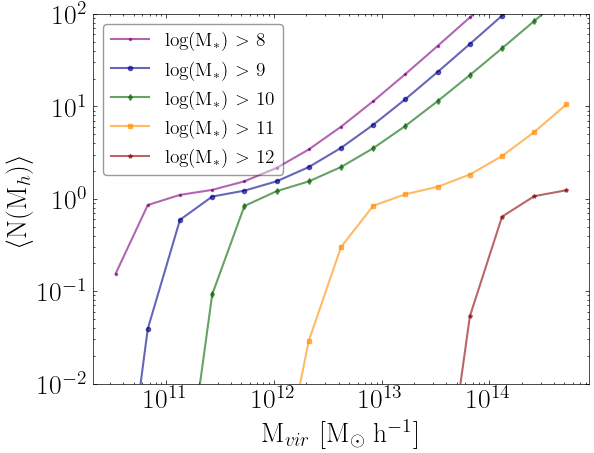

In [39]:
fig = plt.figure(figsize = (6.4,4.8))
ax = fig.subplots()

for i in range(0, len(fits)):
    ax.plot(fits[i][0], fits[i][1], color = colors[i], lw = 1.5, marker = markers[i], label = r'log(M$_{*}$) $>$ '+str(masses[i]), ms = 3, alpha = 0.6)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'M$_{vir}$ [M$_{\odot}$ h$^{-1}$]')
ax.set_ylabel(r'$\langle$N(M$_h$)$\rangle$')
ax.legend(framealpha = 0.4, edgecolor = (0,0,0,1), fontsize = 14)
ax.grid(False) 
ax.set_ylim(10**(-2), 10**2)
fig.savefig('images/diff_HOD_fit.png', dpi = 600)
plt.show()

In [40]:
#Para crear el array centrales = 1 y satelites = 0
central, pos_cen, subh_per_halo = np.unique(SubhaloGrNr, return_index = True, return_counts = True)
cen1_sat0 = np.zeros(len(SubhaloGrNr))
cen1_sat0[pos_cen] = 1

In [41]:
#criterio de masa estelar, para considerar cuando hay una galaxia y cuando no
pos_central_subh = np.where(cen1_sat0 == 1)[0]
pos_sat_subh = np.where(cen1_sat0 == 0)[0]
stellar_mass_cen = stellar_subhmass[pos_central_subh]
stellar_mass_sat = stellar_subhmass[pos_sat_subh]
no_stellar_mass_cen = np.where(stellar_mass_cen > 10**9)[0]
no_stellar_mass_sat = np.where(stellar_mass_sat > 10**9)[0]
no_stellar_mass_all = np.where(stellar_subhmass > 10**9)[0]

In [42]:
#calculamos la función correlación proyectada
N_bins = 15
bins = np.logspace(np.log10(0.1), np.log10(20.0), N_bins + 1)
boxsize = 205 #Mpc/h
subh_posx = subh_posx_Mpc[pos_sat_subh] #posiciones de las que cumplen el criterio
subh_posy = subh_posy_Mpc[pos_sat_subh] #posiciones de las que cumplen el criterio
subh_posz = subh_posz_Mpc[pos_sat_subh] #posiciones de las que cumplen el criterio

In [43]:
from Corrfunc.theory.wp import wp
w_p_corr_func = wp(boxsize, pimax = 10, nthreads = 8, binfile = bins, X = subh_posx, Y = subh_posy, Z = subh_posz, verbose = True, output_rpavg = True)
r_p = np.asarray(w_p_corr_func['rpavg'])
w_p = np.asarray(w_p_corr_func['wp'])

In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 20,20,20.  Time taken =   0.042 sec
countpairs_wp_float> gridlink seems inefficient. nmesh = (20, 20, 20); avg_np = 263. Boosting bin refine factor - should lead to better performance
xmin = 0.000000 xmax=205.000000 rpmax = 20.000000
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 30,30,20.  Time taken =   0.032 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  4.704 secs


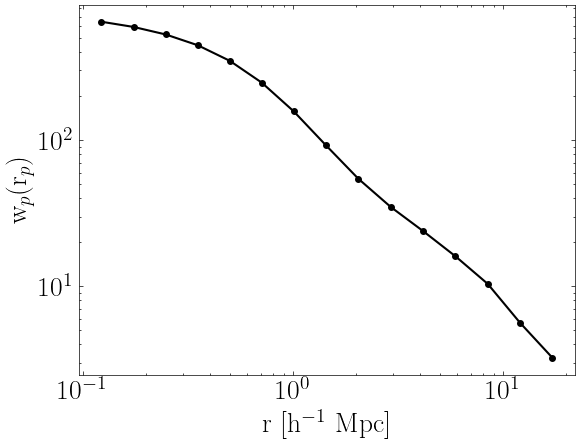

In [44]:
fig = plt.figure(figsize=(6.4,4.8))
ax = fig.subplots()

ax.plot(r_p, w_p, color = 'black', marker = 'o', lw = 1.5, ms = 4, label = 'M')

ax.set_xlabel(r' r [h$^{-1}$ Mpc] ')
ax.set_ylabel(r'w$_p$(r$_p$)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(False)
#ax.legend(fontsize = 12, edgecolor = 'black', framealpha = 0.4)
plt.savefig('images/CF_w_p.png', dpi = 600)
plt.show()

In [45]:
#np.save('r_p_sat.npy', r_p)
#np.save('w_p_sat.npy', w_p)

In [46]:
rp_cen = np.load('r_p_cen.npy')
wp_cen = np.load('w_p_cen.npy')

In [47]:
rp_sat = np.load('r_p_sat.npy')
wp_sat = np.load('w_p_sat.npy')

In [48]:
rp_all = np.load('w_p.npy')
wp_all = np.load('r_p.npy')

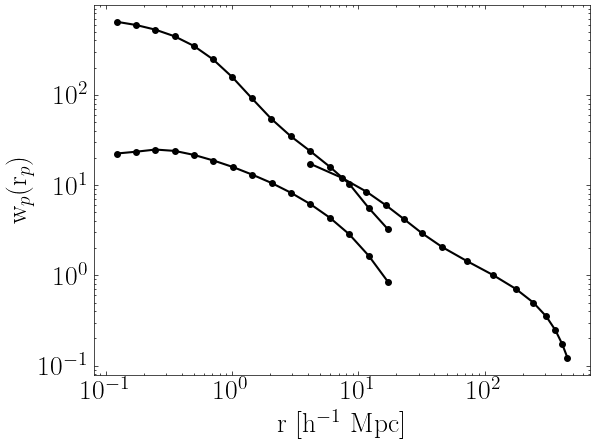

In [49]:
fig = plt.figure(figsize=(6.4,4.8))
ax = fig.subplots()

ax.plot(rp_all, wp_all, color = 'black', marker = 'o', lw = 1.5, ms = 4, label = 'M')
ax.plot(rp_sat, wp_sat, color = 'black', marker = 'o', lw = 1.5, ms = 4, label = 'M')
ax.plot(rp_cen, wp_cen, color = 'black', marker = 'o', lw = 1.5, ms = 4, label = 'M')

ax.set_xlabel(r' r [h$^{-1}$ Mpc] ')
ax.set_ylabel(r'w$_p$(r$_p$)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(False)
#ax.legend(fontsize = 12, edgecolor = 'black', framealpha = 0.4)
#plt.savefig('images/CF_w_p.png', dpi = 600)
plt.show()

In [250]:
#calculamos la 3D CF (landy and szalay)
from Corrfunc.theory.DD import DD

In [251]:
N = len(subh_posx)
x_random = np.random.uniform(min(subh_posx), boxsize, N).astype(np.float32)
y_random = np.random.uniform(min(subh_posy), boxsize, N).astype(np.float32)
z_random = np.random.uniform(min(subh_posz), boxsize, N).astype(np.float32)
print(subh_posx)
print(x_random)

[ 43.718815  45.442276  44.490765 ...  50.662014 183.48979  140.00209 ]
[ 91.039856  87.61947  131.78911  ...  60.73172   87.24114  107.1083  ]


In [252]:
res_dd = DD(autocorr = 1, nthreads = 8, binfile = bins, X1 = subh_posx, Y1 = subh_posy, Z1 = subh_posz, periodic = True, boxsize = boxsize, verbose = True, output_ravg = True)
res_rr = DD(autocorr = 1, nthreads = 8, binfile = bins, X1 = x_random, Y1 = y_random, Z1 = z_random, periodic = True, boxsize = boxsize, verbose = True, output_ravg = True)
res_dr = DD(autocorr = 0, nthreads = 8, binfile = bins, X1 = subh_posx, Y1 = subh_posy, Z1 = subh_posz, periodic = True, boxsize = boxsize, X2 = x_random, Y2 = y_random, Z2 = z_random, verbose = True, output_ravg = True)

Running with points in [xmin,xmax] = -0.000094,204.999969 with periodic wrapping = 205.000000
Running with points in [ymin,ymax] = 0.000086,205.000015 with periodic wrapping = 205.000000
Running with points in [zmin,zmax] = 0.000129,204.999985 with periodic wrapping = 205.000000
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 20,20,10.  Time taken =   0.055 sec
countpairs_float> gridlink seems inefficient. nmesh = (20, 20, 10); avg_np = 654. Boosting bin refine factor - should lead to better performance
xmin = -0.000094 xmax=204.999969 rpmax = 20.000000
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 30,30,10.  Time taken =   0.048 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 11.049 secs
Running with points in [xmin,xmax] = 0.000042,204.999969 with periodic wrapping = 205.000000
Running with points in [ymin,ymax] = 0.000093,204.999954 with periodic wrappin

In [253]:
#numero de pares, según dd, rr, dr
dd_pairs = res_dd['npairs']
rr_pairs = res_rr['npairs']
dr_pairs = res_dr['npairs']

#radios promedios por bin
prom_rad_dd = res_dd['ravg']
prom_rad_rr = res_rr['ravg']
prom_rad_dr = res_dr['ravg']

print(prom_rad_dd)
print(prom_rad_rr)

[ 0.12267576  0.17465506  0.2485345   0.35324386  0.50146353  0.71105182
  1.00768638  1.42986238  2.03833771  2.92913246  4.18070459  5.97123051
  8.51372433 12.15677261 17.31890297]
[ 0.12329997  0.1758467   0.25059021  0.35652211  0.507837    0.72293568
  1.02934957  1.46521294  2.08609152  2.96974397  4.22792721  6.0190444
  8.56905365 12.19909954 17.36746979]


In [254]:
#nueva fomra de normalizar
DD_new = dd_pairs/(N*(N-1))
RR_new = rr_pairs/((3*N)*(3*N -1))
DR_new = dr_pairs/((3*N)*(N))

In [255]:
corr_func_LS = (DD_new - (2*DR_new) + RR_new)/RR_new #C.F. Landy & Szalay

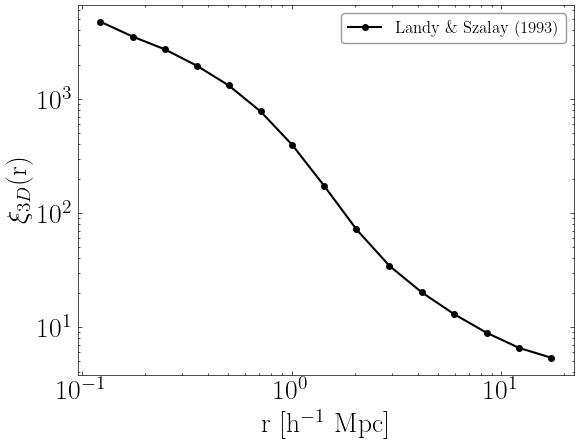

In [261]:
fig = plt.figure(figsize=(6.4,4.8))
ax = fig.subplots()

ax.plot(prom_rad_dd, corr_func_LS, label = r'Landy \& Szalay (1993)', color = 'black', marker = 'o', lw = 1.5, ms = 4)

ax.set_xlabel(r' r [h$^{-1}$ Mpc] ')
ax.set_ylabel(r'$\xi_{3D}$(r)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(False)
ax.legend(fontsize = 12, edgecolor = 'black', framealpha = 0.4)
plt.savefig('images/CF_La_and_Sz.png', dpi = 600)
plt.show()